<a href="https://colab.research.google.com/github/agus2207/ESCOM/blob/master/Analisis_de_imagenes/P1_AGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1w0hKLRBfUWki17i13oJcYhpwHa2tEon1oZagn7lYdogzehai&usqp=CAU" width="100" height="100" align="left" alt="IPN"/>
<img src="https://img1.freepng.es/20180531/hyf/kisspng-escom-instituto-politcnico-nacional-escuela-supe-lemon-grass-5b0fbe5636a625.6618946915277584222239.jpg" width="100" height="100" align="right" alt="Escom"/>
<h1><center><b>Análisis de Imagenes</b></center></h1>
<h1><center><b>Practica 1: Manipulación del histograma</b></center></h1>

---

- **`Nombre:`** Galindo Reyes Agustin
- **`Grupo`**: 3CV6.
- **`Materia`**: Análisis de Imágenes.
- **`Profesora`**: Maria Elena Cruz Meza.
- **`Fecha de entrega`**: 02 de Abril del 2020.
- **`Objetivo`**: Comprender el funcionamiento y operación de las distintas técnicas de Manipulación del Histograma para la mejora de la imagen:
  1. Conocer los conceptos básicos de manipulación del histograma de una imagen.
  2. Analizar el tratamiento de la imagen a travez de una manipulación estadistica de los datos
  3. Analizar la conveniencia de aplicar una mejora del brillo en la imagen, preparándola para su posterior tratamiento




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Image_analisis/Practica1_ME/Imagenes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Image_analisis/Practica1_ME/Imagenes


# **Histograma**

En sentido general, un histograma es un gráfico que muestra la distribución de frecuencias de una variable dada. En el caso de la imágenes, el histograma da una idea general sobre la distribución de intensidades. Cuando hablamos de imágenes, un histograma es un gráfico con valores de píxeles (que, en general, oscilan entre 0 y 255 aunque no siempre) en el eje X y la cantidad correspondiente de píxeles en la imagen en el eje Y.

Es simplemente otra manera de entender la imagen. Al mirar el histograma de una imagen, se puede tener idea sobre el contraste, el brillo, la distribución de intensidad, etc. de esa imagen. Casi todas las herramientas de procesamiento de imágenes de hoy en día, proporcionan características en el histograma. **[1]**

El representación gráfica del histograma cuenta con dos ejes, uno vertical y otro horizontal. Lo importante es que recuerdes que indica cada eje: **[2]**

- El eje vertical nos dice la cantidad de píxeles que hay de cada tono, es decir, cuanto más alta sea la barra más tonos como ese habrá en la fotografía.
- El eje horizontal indica los diferentes tonos de grises que hay. En la parte izquierda se encuentra el negro puro y en la parte derecha del eje horizontal el blanco puro, entre media encontrarás los tonos de grises o luminosidad.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from PIL import Image

# **Ajuste de brillo**

El principal objetivo de las técnicas de mejora es procesar una imagen de forma que resulte más adecuada que la original para un procesamiento posterior o bien de alguna manera para que la imagen de salida sea más fácil de interpretar. Existen métodos que al aplicarlos a un determinado problema son útiles o no lo son.

Las técnicas básicas de transformación del histograma resultan muy útiles para modificar el brillo y contraste de una imagen. **[3]**


Algunas funciones de apoyo para cargar imagenes e histogramas

In [ ]:
def im_show(pic):
    height=pic.shape[0]
    width=pic.shape[1]
    
    print(type(pic))
    channels=1
    if pic.ndim>2:
        channels=3
    ip="nearest"
    plt.figure(figsize=(10,int(10*float(height)/float(width)) ))
    if channels==1:
        plt.imshow(pic,cmap='gray',interpolation=ip,aspect="auto")
    else:
        plt.imshow(pic,interpolation=ip,aspect="auto")

def im_load(file):
    pic=Image.open(file) #Open the image
    print("Image type:"+str(type(pic))) #Displays the type of image (JPEG, BMP, PNG, GIF, etc)
    pic_arr = np.asarray(pic) #converts the image to an Numpy Array
    print("Dimentions"+str(pic_arr.shape)) #(height,width,#of channels)
    pic_channels=1
    if pic_arr.ndim>2:
        pic_channels=3
    print("Channels:"+str(pic_channels))
    #im_show(pic_arr)
    return pic_arr

def histograma(pic_arr):
    height=pic_arr.shape[0]
    width=pic_arr.shape[1]
    dim = pic_arr.ndim
    if dim == 2:
        hist_gray=np.zeros(256)
        for i in range(0,height):
            for j in range(0, width):
                hist_gray[pic_arr[i,j]]+=1
        return hist_gray
        #plt.plot(hist_gray,color = "black")
    elif dim >=3:
        hist_rgb = np.zeros((3,256))

        ##CODE TO CALCULATE RED, BLUE AND GREEN CHANNEL HISTOGRAM AT THE SAME TIME
        for i in range(height):
            for j in range(width):
                for k in range(pic_arr.shape[2]):
                    hist_rgb[k,pic_arr[i,j,k]] += 1
  
        return hist_rgb
        """plt.plot(hist_rgb[0],color = "r")
        plt.plot(hist_rgb[1],color = "g")
        plt.plot(hist_rgb[2],color = "b")
        plt.show()"""

def imagen_histograma(pic_arr, histograma):
    fig, axs = plt.subplots(1, 2, figsize=(20,5))
    axs[0].imshow(pic_arr, cmap='gray')
    axs[0].set_xlabel("Imagen")
    if histograma.shape[0] == 2:
        axs[1].plot(histograma,color = "black")
    elif histograma.shape[0] >= 3:
        axs[1].plot(histograma[0], color = "r")
        axs[1].plot(histograma[1], color = "g")
        axs[1].plot(histograma[2], color = "b")
    axs[1].set_xlabel("Histograma")

def histogramaRGB(pic_arr):
    height=pic_arr.shape[0]
    width=pic_arr.shape[1]
    hist_red=np.zeros(256)
    for i in range(0,height):   #FOR EVERY ROW   
        for j in range(0,width):   #FOR EVERY COLUMN
            hist_red[pic_arr[i,j,0]]+=1
    #GREEN CHANNEL
    hist_green=np.zeros(256)
    for i in range(0,height):   #FOR EVERY ROW   
        for j in range(0,width):   #FOR EVERY COLUMN
            hist_green[pic_arr[i,j,1]]+=1
    #BLUE CHANNEL
    hist_blue=np.zeros(256)
    for i in range(0,height):   #FOR EVERY ROW   
        for j in range(0,width):   #FOR EVERY COLUMN
            hist_blue[pic_arr[i,j,2]]+=1
    fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
    axs[0].plot(hist_red,color = "r")
    axs[0].set_xlabel("red")
    axs[1].plot(hist_green,color = "g")
    axs[1].set_xlabel("green")
    axs[2].plot(hist_blue,color = "b")
    axs[2].set_xlabel("blue")
    fig.suptitle('Histogram channels')

# **Desplazamiento**
El desplazamiento de un histograma consiste en mover de lugar el histograma. Esto se obtiene sumando un valor constante llamado valor de desplazamiento a cada uno de los niveles de gris de la escena de la siguiente manera:

\begin{equation}
g(i,j) = f(i,j)+DES
\end{equation}

Donde:

- DES en un valor constante
- $f(i,j)$ es el nivle de gris de la imagen de entrada

El despalzamiento es útil para aclarar u oscurecer una imagen, manteniendo la relación entre los valores de los niveles de grises. **[4]**

In [ ]:
def desplazamiento(arr_pic,des):
    img_des = arr_pic.copy()
    height = img_des.shape[0]
    width = img_des.shape[1]
    channel = 1
    if img_des.ndim == 3:
        channel = img_des.shape[2]
    if channel == 1:
        for i in range(0,height):
            for j in range(0, width):
                img_des[i,j] = arr_pic[i,j]+des
    elif channel >= 3:
        for i in range(0,height):
            for j in range(0, width):
                for k in range(0,channel):
                    img_des[i,j,k] = arr_pic[i,j,k]+des
    img_des[img_des < 0] = 0
    img_des[img_des > 255] = 255
    return img_des

# **Expansión**

Consiste en distribuir las frecuencias de la apariencia de los píxeles en todo el ancho del histograma. Por lo tanto, es una operación que consiste en modificar el histograma de manera de distribuir las intensidades en la escala de valores disponibles de la mejor forma posible. Esto equivale a expandir el histograma de manera que el valor de la intensidad más baja sea cero y el de la intensidad más alta sea el valor máximo.

Su Formula esta dada por :

\begin{equation}
g(i,j) = \left[\frac{f(i,j)-f(i,j)_{min}}{f(i,j)_{max}-f(i,j)_{min}}\right][MAX-MIN]+MIN
\end{equation}

Donde:
- $f(i,j)$ es el nivel de gris de la imagen de entrada.
- $f(i,j)_{max}$ y $f(i,j)_{min}$ son el máximo y mínimo nivel de gris de la imagen de entrada respectivamente.
- $MAX$ y $MIN$ corresponden a los máximo y mínimos valores de gris posibles de los niveles de gris; para nuestro caso 255 y 0 respectivamente.

Es útil para el realce de la imagen, da un aumento del contraste de los niveles de grises presentes en la imagen. **[5]**

In [ ]:
def expansion(arr_pic, cmax, cmin):
    img_exp = arr_pic.copy()
    height = img_exp.shape[0]
    width = img_exp.shape[1]
    channel = 1
    if img_exp.ndim == 3:
        channel = img_exp.shape[2]
    if channel == 1:
        for i in range(0,height):
            for j in range(0, width):
                fmax = np.max(arr_pic)
                fmin = np.min(arr_pic)
                img_exp[i,j] = (((arr_pic[i,j]-fmin)/(fmax-fmin))*(cmax-cmin))+cmin
    elif channel >= 3:
        for i in range(0,height):
            for j in range(0, width):
                for k in range(0,channel):
                    fmax = np.max(arr_pic[:,:,k])
                    fmin = np.min(arr_pic[:,:,k])
                    img_exp[i,j,k] = (((arr_pic[i,j,k]-fmin)/(fmax-fmin))*(cmax-cmin))+cmin
    img_exp[img_exp < 0] = 0
    img_exp[img_exp > 255] = 255
    return img_exp

# **Contracción**

Consiste en contraer las frecuencias de la apariencia de los píxeles en todo el ancho del histograma. Al contraer el histograma se disminuye el rango dinámico de la distribución de niveles de gris de la imagen.

Su formula esta dada por:

\begin{equation}
g(i,j) = \left[\frac{C_{max}-C_{min}}{f(i,j)_{max}-f(i,j)_{min}}\right][f(i,j)-f(i,j)_{min}]+C_{min}
\end{equation}

Donde:

- $C_{max}$ y $C_{min}$ son los valores deseados de la comprensión
- $f(i,j)_{max}$ y $f(i,j)_{min}$  son el máximo y mínimo nivel de gris de la imagen de entrada respectivamente.
- $f(i,j)$ es el nivel del pixel evaluado.

Es útil para reducir el contraste de los niveles de grises presentes en la imagen, hace una disminución de brillo. **[5]**

In [ ]:
def contraccion(arr_pic, cmax, cmin):
    img_cont = arr_pic.copy()
    height = img_cont.shape[0]
    width = img_cont.shape[1]
    channel = 1
    if img_cont.ndim == 3:
        channel = img_cont.shape[2]
    if channel == 1:
        for i in range(0,height):
            for j in range(0, width):
                fmax = np.max(arr_pic)
                fmin = np.min(arr_pic)
                img_cont[i,j] = (((cmax-cmin)/(fmax-fmin))*(arr_pic[i,j]-fmin))+cmin
    elif channel >= 3:
        for i in range(0,height):
            for j in range(0, width):
                for k in range(0,channel):
                    fmax = np.max(arr_pic[:,:,k])
                    fmin = np.min(arr_pic[:,:,k])
                    img_cont[i,j,k] = (((cmax-cmin)/(fmax-fmin))*(arr_pic[i,j,k]-fmin))+cmin
    img_cont[img_cont < 0] = 0
    img_cont[img_cont > 255] = 255
    return img_cont

# **Ecualización Uniforme**

Para modificar una imagen también se pueden utilizar operaciones globales, como lo es la ecualización de histograma, que tiene como objetivo acentuar el contraste visual, aprovechando de mejor manera el rango de valores de intensidad disponible. El histograma se considera ecualizado si todos los niveles de intensidad tienen una frecuencia lo más similar posible. Para lograr esto en la práctica, basta con lograr que el histograma acumulado de la imagen se aproxime a una recta.

Su formula esta dada por:

\begin{equation}
F(g)=[g_{mas}-g_{min}]P_g(g)+g_{min}
\end{equation}

Donde:

- $g_{max}$ y $g_{min}$ son los valores deseados de la ecualización
- P_g(g) es la acumulacion de incidencias por cada pixel

Su principal función es la de distribuir el brillo en la imagen. **[6]**

In [ ]:
def ecualizacion(arr_pic, gmax, gmin):
    img_ecualizada = arr_pic.copy()
    height = img_ecualizada.shape[0]
    width = img_ecualizada.shape[1]
    channel = 1
    if img_ecualizada.ndim == 3:
        channel = img_ecualizada.shape[2]
    total = 0
    pg = 0.0
    if channel >= 3:
        for i in range(0,channel):
            for j in range(0,256):
                total = (arr_pic[:,:,i]==j).sum()
                pg = pg+(total/(height*width))
                img_ecualizada[arr_pic[:,:,i] == j] = round(((gmax-gmin)*pg)+gmin)
            pg = 0.0
            total = 0
    elif channel == 1:
        for j in range(0,256):
            total = (arr_pic == j).sum()
            pg = pg+(total/(height*width))
            img_ecualizada[arr_pic == j] = round(((gmax-gmin)*pg)+gmin)
    img_ecualizada[img_ecualizada < 0] = 0
    img_ecualizada[img_ecualizada > 255] = 255
    return img_ecualizada

# **Imagen Original**

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(150, 213, 3)
Channels:3


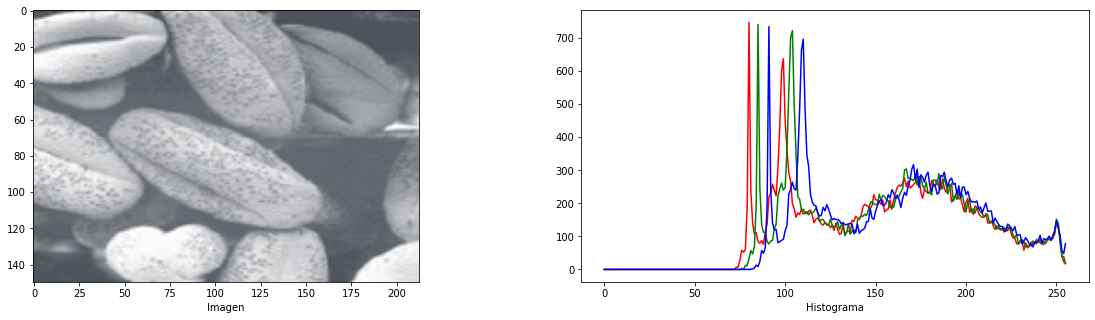

In [ ]:
ruta = "./"
nombre = "Imagen Original.jpg"
arr_pic = im_load(ruta+nombre)
histogram = histograma(arr_pic)
imagen_histograma(arr_pic, histogram)

# **Modificacion del histograma por Desplazamiento**

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(151, 211, 3)
Channels:3


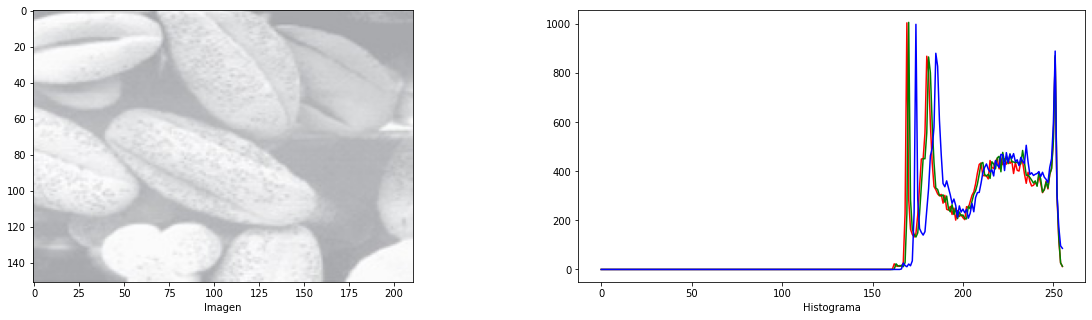

In [ ]:
nombre4 = "Imagen4.jpg"
arr_pic4 = im_load(ruta+nombre4)
histogram4 = histograma(arr_pic4)
imagen_histograma(arr_pic4,histogram4)

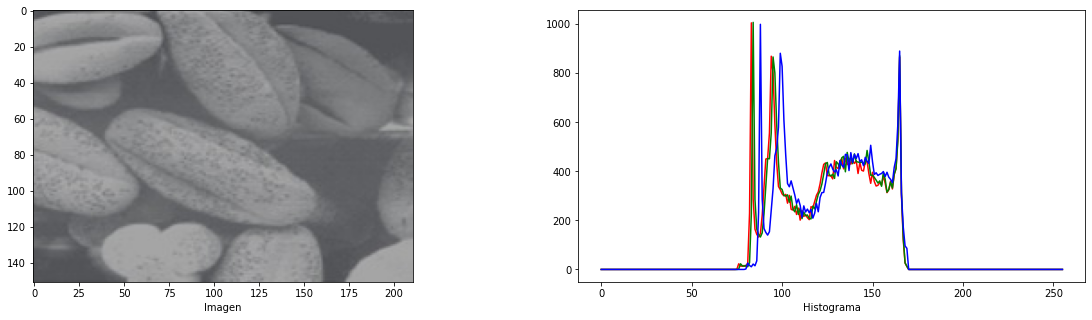

In [ ]:
img_des = desplazamiento(arr_pic4,170)
histogram_des = histograma(img_des)
imagen_histograma(img_des,histogram_des)

Como podemos observar la primer imagen es demasiado clara tanto por la imagen como por el histograma ya que predomina del lado derecho, por lo que se opta por aplicar la operación de desplazamiento, al aplicar dicha operacion podemos observar que la imagen se oscurece, pero no lo demasiado para que no se logre apreciar. Si observamos el histograma podemos observar que de antes de la operación estaba complatamente hacia la derecha y despues del desplazamiento se mueve al centro manteniendo la relación de los valores originales.

# **Modificacion del histograma por Expansión**

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(148, 212, 3)
Channels:3


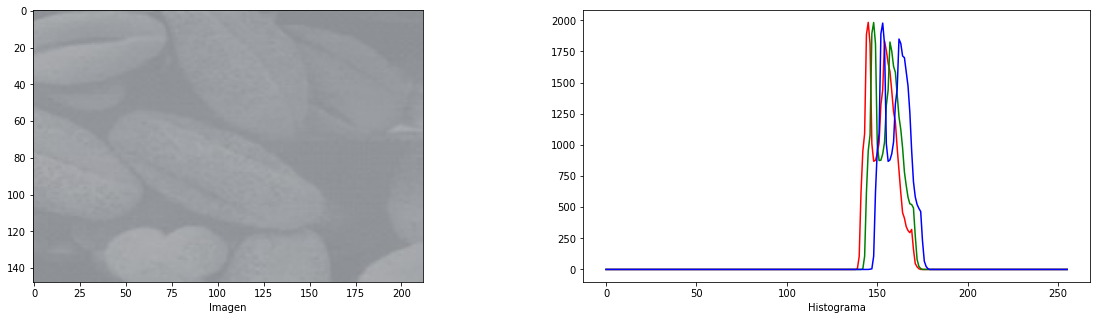

In [ ]:
nombre2 = "Imagen2.jpg"
arr_pic2 = im_load(ruta+nombre2)
histogram2 = histograma(arr_pic2)
imagen_histograma(arr_pic2,histogram2)

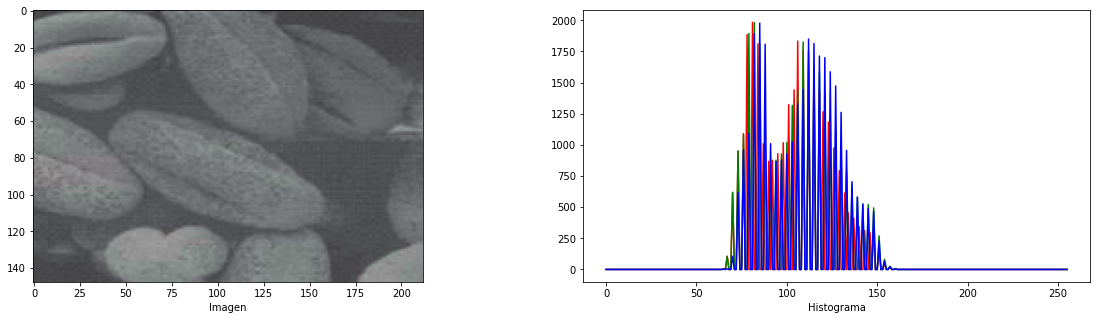

In [ ]:
img_exp = expansion(arr_pic2,160,65)
histogram_exp = histograma(img_exp)
imagen_histograma(img_exp,histogram_exp)

En este caso la imagen a modificar tiene un contraste muy bajo ya que en el histograma podemos observar que en el histograma predomina la luz, por lo que la operación a aplicar es una expansión ya que es la que nos sirve para subir el contraste. Podemos observar que la imagen mejora ya que se logra distinguir los objetos de mejor manera, sin embargo al observar el histograma, los valores originales cambian perdiendo la relacion. También podemos observar que el histograma se distribuye de acuerdo a los valores de MAX y MIN que definimos en este caso 160, 65.

# **Modificacion del histograma por Contracción**

Image type:<class 'PIL.PngImagePlugin.PngImageFile'>
Dimentions(151, 219, 3)
Channels:3


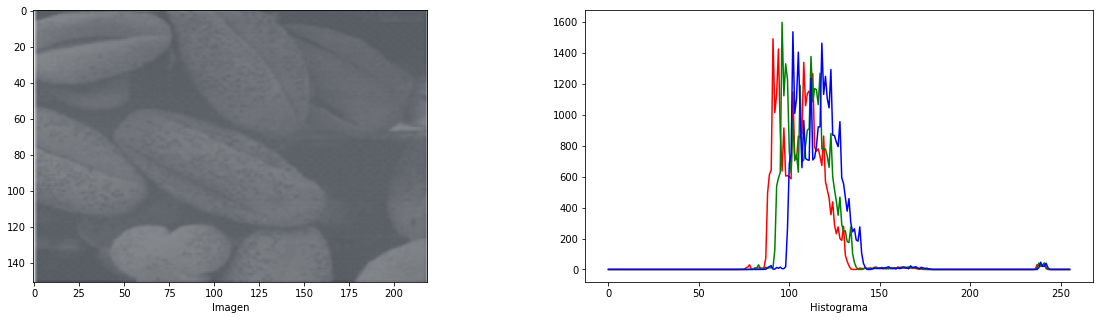

In [ ]:
nombre1 = "Imagen1.png"
arr_pic1 = im_load(ruta+nombre1)
histogram1 = histograma(arr_pic1)
imagen_histograma(arr_pic1,histogram1)

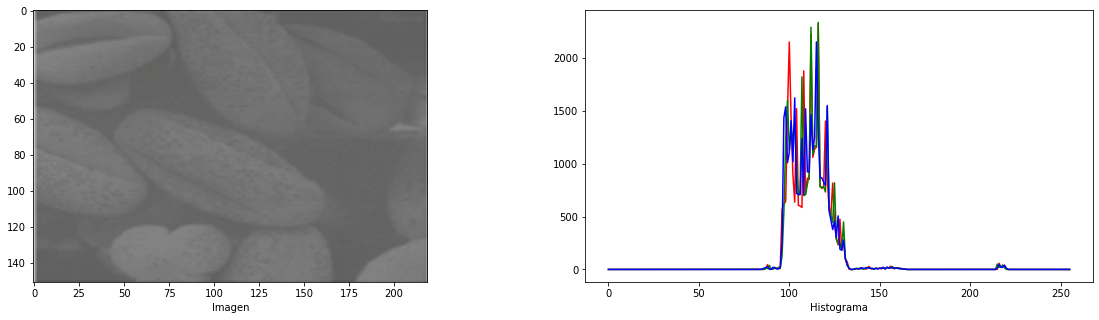

In [ ]:
img_cont = contraccion(arr_pic1,220,85)
histogram_cont = histograma(img_cont)
imagen_histograma(img_cont,histogram_cont)

En este caso podemos ver que la imagen es oscura ya que el histograma esta cargado hacia la izquierda, por lo que necesitaremos disminuir el contraste por lo cual es mas conveniente realizar una contracción. Al realizar la operación podemos observar que la imagen se vuelve mas clara, y el histograma se comprime, pues podemos observar que el histograma original estaba mas amplio al resultante.

# **Modificacion del histograma por Ecualización Uniforme**

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(148, 212, 3)
Channels:3


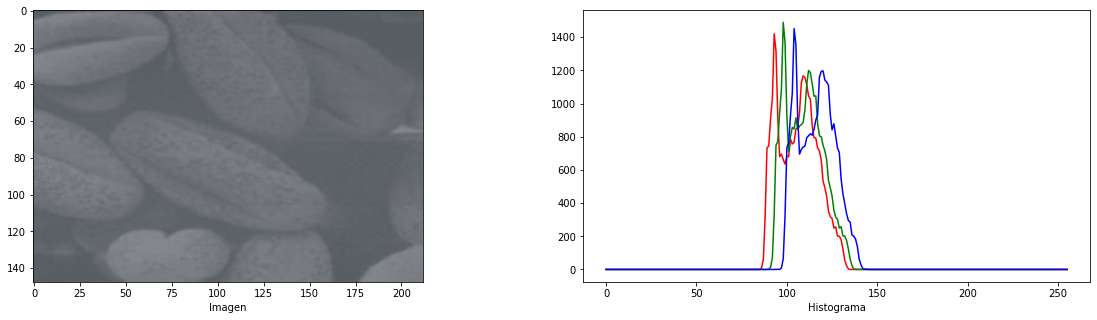

In [ ]:
nombre3 = "Imagen3.jpg"
arr_pic3 = im_load(ruta+nombre3)
histogram3 = histograma(arr_pic3)
imagen_histograma(arr_pic3,histogram3)

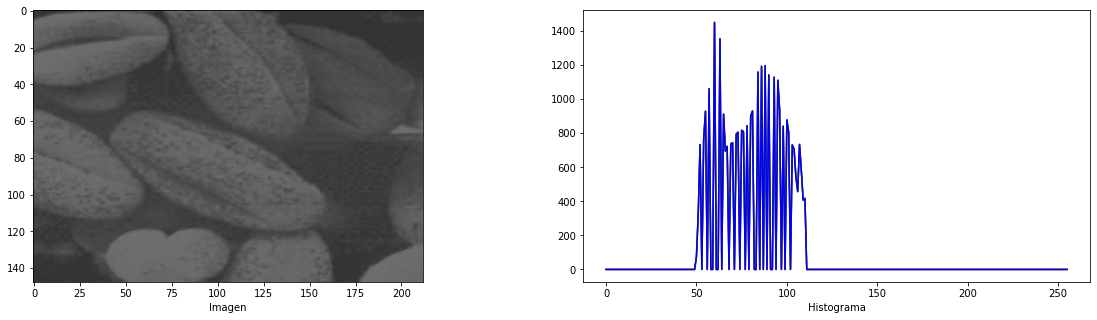

In [ ]:
img_ecua = ecualizacion(arr_pic3,110,50)
histogram_ecua = histograma(img_ecua)
imagen_histograma(img_ecua,histogram_ecua)

Por ultimo para esta imagen se realizo una ecualización uniforme, como podemos ver esta imagen necesitaba un poco de brillo, también por el histograma nos podemos dar cuenta que es oscura ya que la carga de valores es del lado izquierdo. Al realizar podemos observar que la imagen se vuelve mas oscura, sin embargo en el histograma podemos observar solo un color de los 3 (RGB), esto se debe a que en todos los caneles son los mismos valores, pues al hacer el balance de brillo, se nivelaron los 3 canales, en la siguiente imagen se separan los histogramas por colores para comprobar que son los mismos.

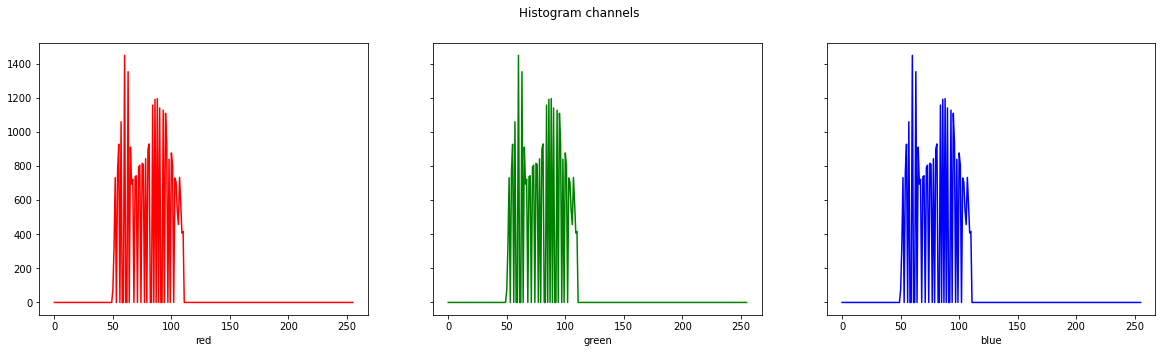

In [ ]:
histogramaRGB(img_ecua)

# **Conclusión**

El ajuste de brillo  importante al tener que hacer el tratamiento en imagenes, ya que se puede mejorar la calidad de la imagen. El saber que para ello contamos con operaciones, que nos permiten realizar cierto ajuste a la imagen es de gran ayuda. Pero es importante saber cuando se debe utilizar cada operación para la modificación de un histograma, ya que podemos tener las herramienas para operar la imagen, pero si no sabemos utilizarlas de nada sirve saber que existen.

Otra cosa que se observo en la practica es la importancia de saber interpretar el histograma, ya que gracias al histograma se hizo mas facil el saber que operacion era mas conveniente aplicar en la imagen a tratar. 

# **Bibliografia**

[1] Graficar y analizar histogramas - Cursos de Programación de 0 a Experto © Garantizados. (2020). Retrieved 23 March 2020, from https://unipython.com/graficar-analizar-histogramas/

[2] Llanos, J. (2020). El Histograma En Fotografía - 7 Claves Para Dominarlo y Consejos. Retrieved

[3] María Elena, C. s.f. Unidad II. Análisis Espacial 2.2.1 Ajuste de brillo. [Diapositivas de PowerPoint]. Recuperado de: https://docs.google.com/presentation/d/e/2PACX-1vQLQ5sUYHGo024jhPJjjsQbv7iSyYo-65IJM45eIxunCQJgHXjgon5nyHi-aVNMUQ/pub?start=false&loop=true&delayms=3000#slide=id.p2 

[4] González, R., & Woods, R. (2008). Digital image processing (p. 142). Harlow: Prentice Hall.

[5] Mejoramiento de Imágenes en el Dominio Espacial - lemared. (2020). Retrieved 23 March 2020, from https://sites.google.com/site/lemared/dominio-espacial

[6] [1]Ruiz del Solar, J. (2015, 24 septiembre). Filtrado de Imágenes y ecualización de
histograma. Recuperado 22 marzo, 2020, de
https://www.u-cursos.cl/usuario/b4eb6d37062854338662ba7470704112/mi_blog/r/EL7008_
__Tarea_1.pdf


# Sección nueva